# Phishing Domain Detection (Model Training and Evaluation)

[Dataset Link](https://data.mendeley.com/datasets/72ptz43s9v/1)<br>
[Dataset Description](https://www.sciencedirect.com/science/article/pii/S2352340920313202)

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings
import os

In [2]:
os.chdir('..')

In [3]:
df = pd.read_csv("data/dataset_full.csv")
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [4]:
X = df.drop(columns=['phishing'])
X.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,3,0,0,1,0,0,0,0,0,0,...,-1,1,2,0,892,0,0,0,0,0
1,5,0,1,3,0,3,0,2,0,0,...,150,1,2,1,9540,1,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,-1,1,2,3,589,1,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,-1,1,2,0,292,1,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,306,1,2,1,3597,0,1,0,0,0


In [5]:
y = df['phishing']
y

0        1
1        1
2        0
3        1
4        0
        ..
88642    0
88643    0
88644    1
88645    1
88646    0
Name: phishing, Length: 87209, dtype: int64

In [6]:
y.values.ravel()

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [7]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)

# checking the sizes of the sample data
print("Size of X:", X.shape)
print("Size of y:", y.shape)

Size of X: (113424, 111)
Size of y: (113424,)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(113424, 111)

In [9]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90739, 111), (22685, 111), (90739,), (22685,))

In [10]:
# import pickle
# pickle.dump(scaler, open('scaling.pkl','wb'))

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    class_report = classification_report(predicted , true, target_names=["legitimate","malicious"])
    return accuracy, class_report



Naive Bayes Classifier
--------------------
Train Accuracy: 0.7675641124544021
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       0.96      0.69      0.81     63086
   malicious       0.57      0.94      0.71     27653

    accuracy                           0.77     90739
   macro avg       0.77      0.82      0.76     90739
weighted avg       0.84      0.77      0.78     90739

-----------------------------------
Test Accuracy: 0.7763279700242451
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.96      0.70      0.81     15663
   malicious       0.59      0.94      0.72      7022

    accuracy                           0.78     22685
   macro avg       0.77      0.82      0.77     22685
weighted avg       0.85      0.78      0.78     22685



Decision Tree Classifier
--------------------
Train Accuracy: 0.9999559175216831
Train Classification Report:
               precision  

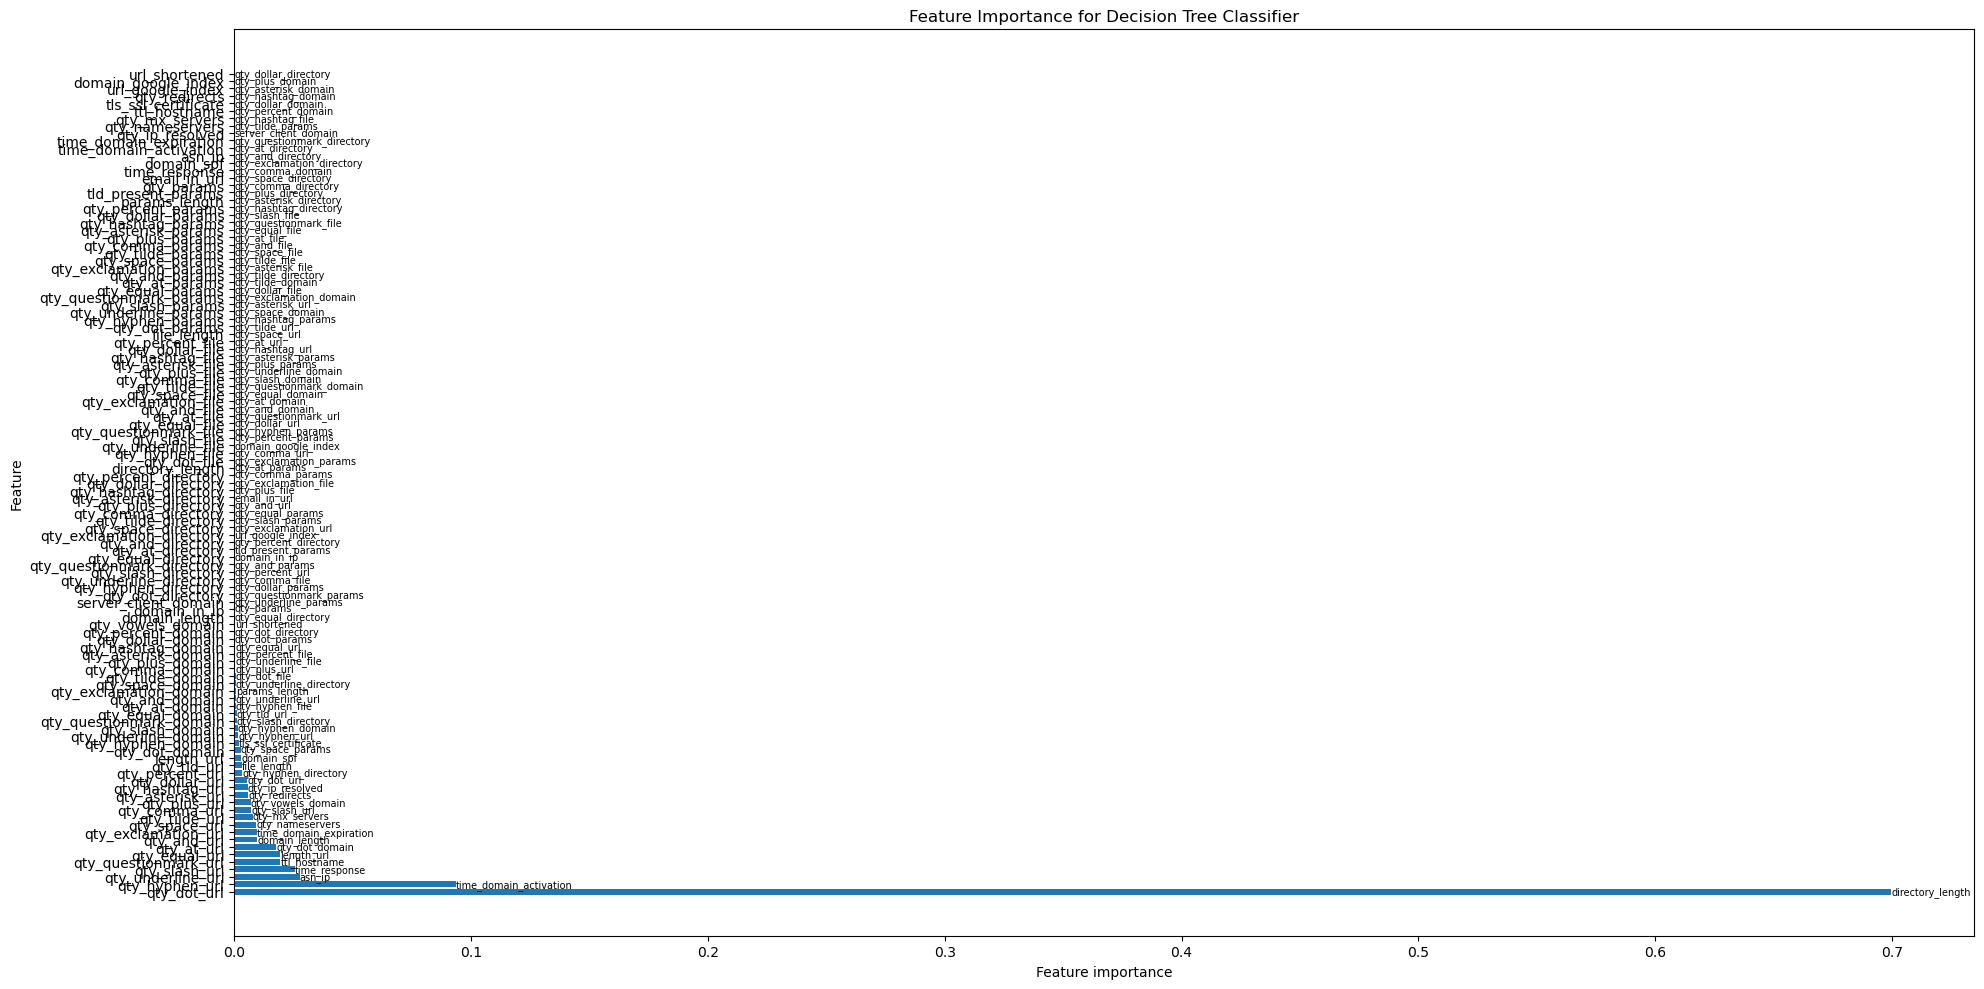

Random Forest Classifier
--------------------
Train Accuracy: 0.9999559175216831
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     45245
   malicious       1.00      1.00      1.00     45494

    accuracy                           1.00     90739
   macro avg       1.00      1.00      1.00     90739
weighted avg       1.00      1.00      1.00     90739

-----------------------------------
Test Accuracy: 0.9768128719418118
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.97      0.98      0.98     11307
   malicious       0.98      0.97      0.98     11378

    accuracy                           0.98     22685
   macro avg       0.98      0.98      0.98     22685
weighted avg       0.98      0.98      0.98     22685





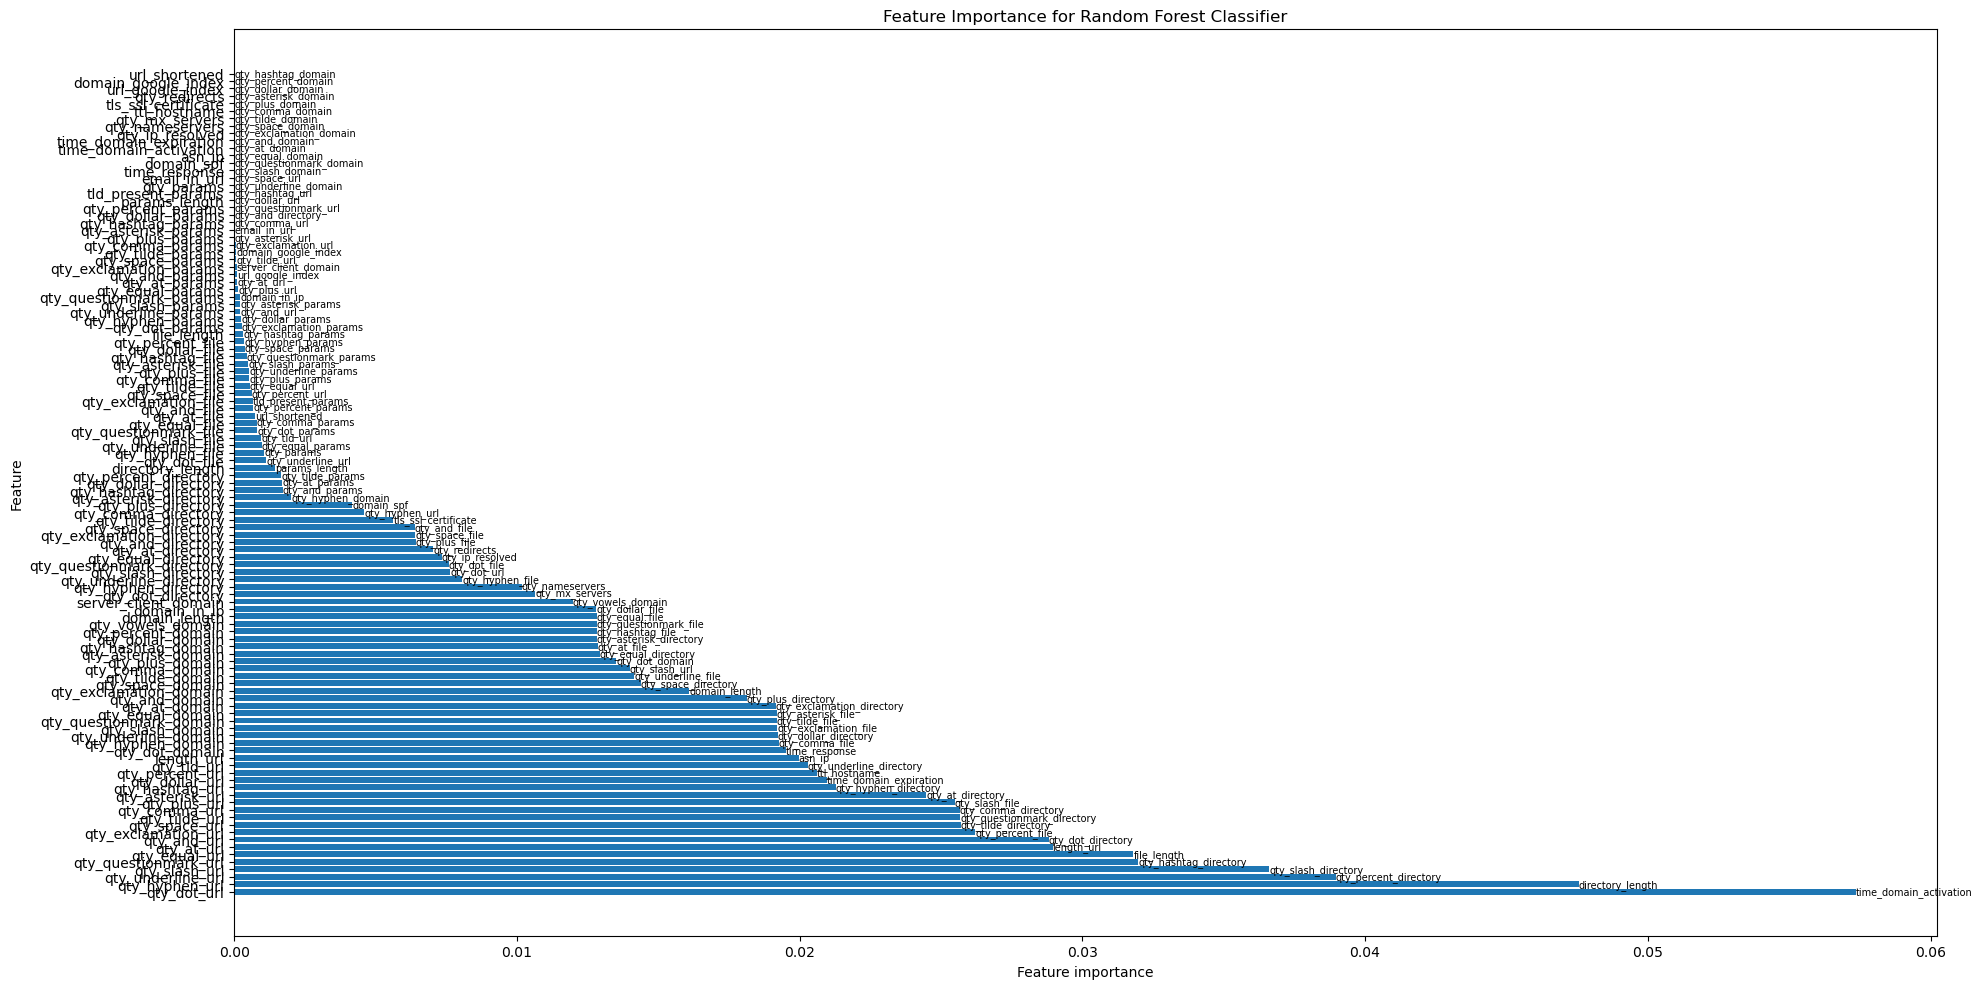

XGBClassifier
--------------------
Train Accuracy: 0.984989916133085
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       0.98      0.99      0.98     45113
   malicious       0.99      0.98      0.99     45626

    accuracy                           0.98     90739
   macro avg       0.98      0.98      0.98     90739
weighted avg       0.98      0.98      0.98     90739

-----------------------------------
Test Accuracy: 0.9750936742340753
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.97      0.98      0.98     11348
   malicious       0.98      0.97      0.97     11337

    accuracy                           0.98     22685
   macro avg       0.98      0.98      0.98     22685
weighted avg       0.98      0.98      0.98     22685





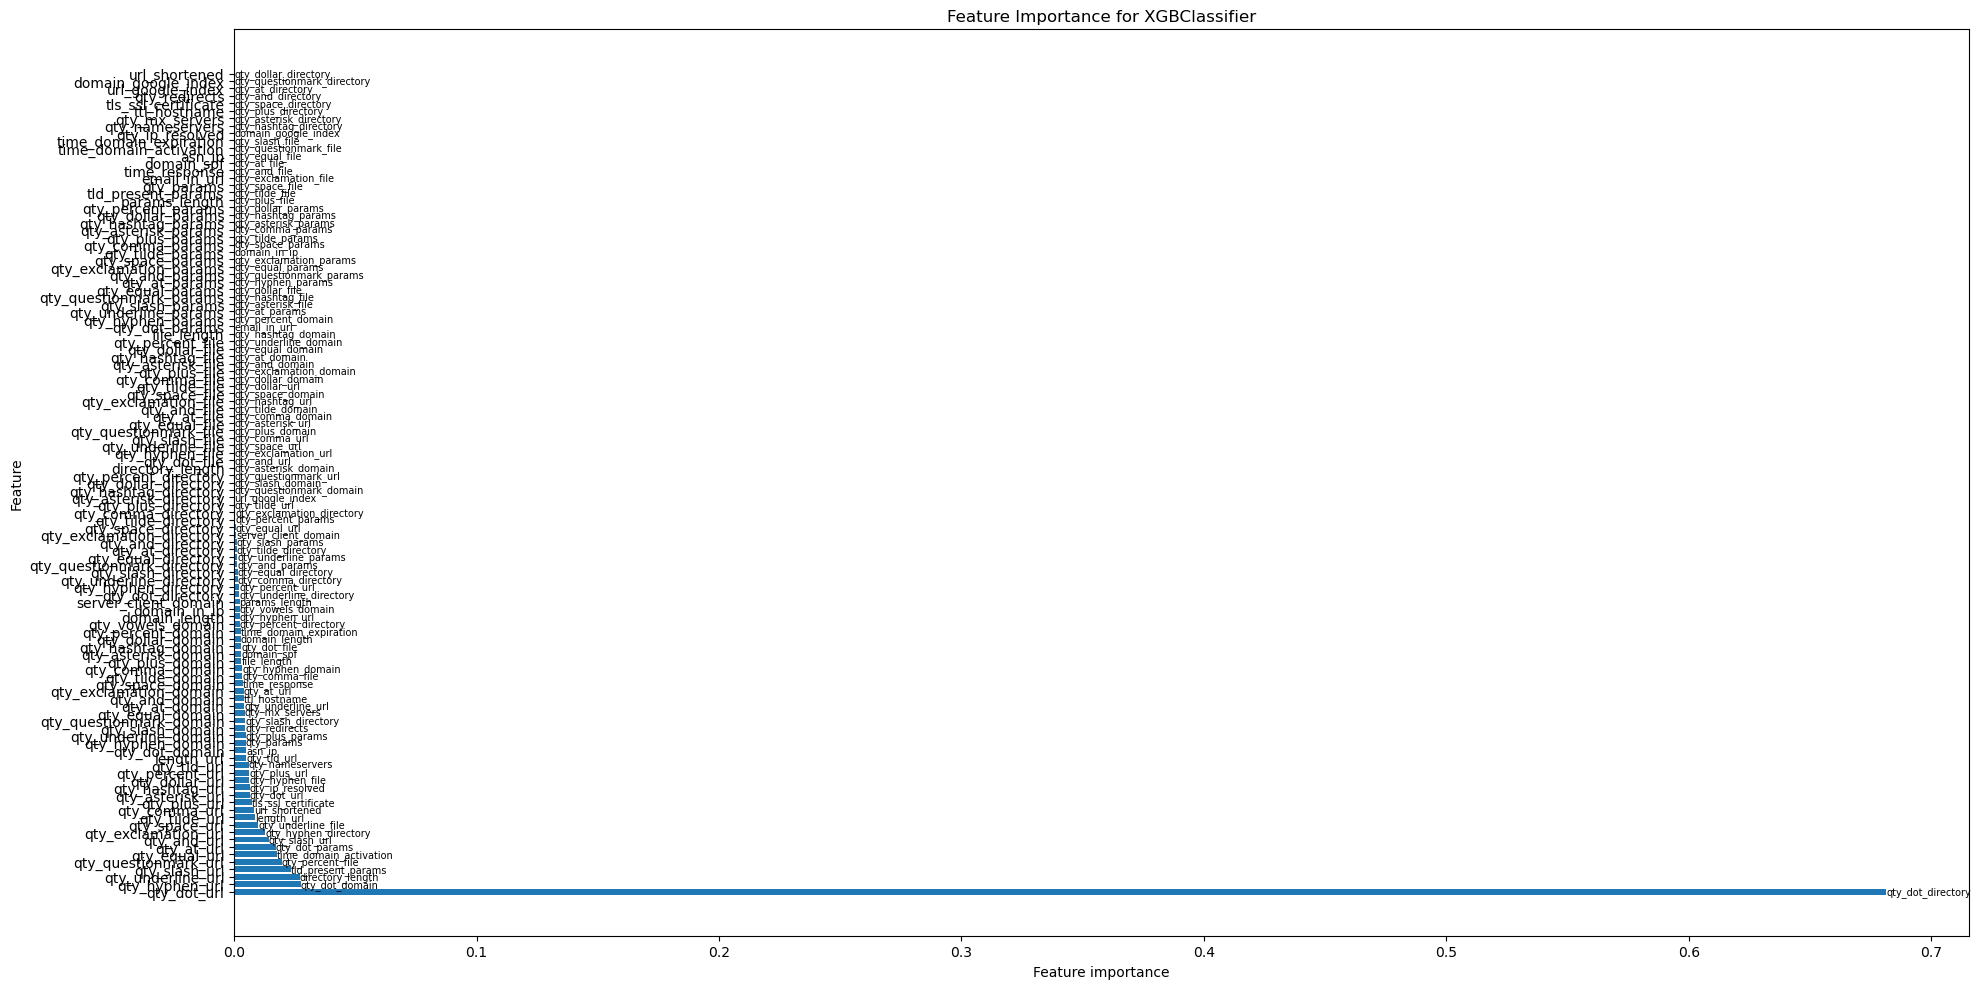

CatBoost Classifier
--------------------
Train Accuracy: 0.9830392664675608
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       0.98      0.98      0.98     45142
   malicious       0.98      0.98      0.98     45597

    accuracy                           0.98     90739
   macro avg       0.98      0.98      0.98     90739
weighted avg       0.98      0.98      0.98     90739

-----------------------------------
Test Accuracy: 0.9751818382190875
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.97      0.98      0.98     11346
   malicious       0.98      0.97      0.98     11339

    accuracy                           0.98     22685
   macro avg       0.98      0.98      0.98     22685
weighted avg       0.98      0.98      0.98     22685





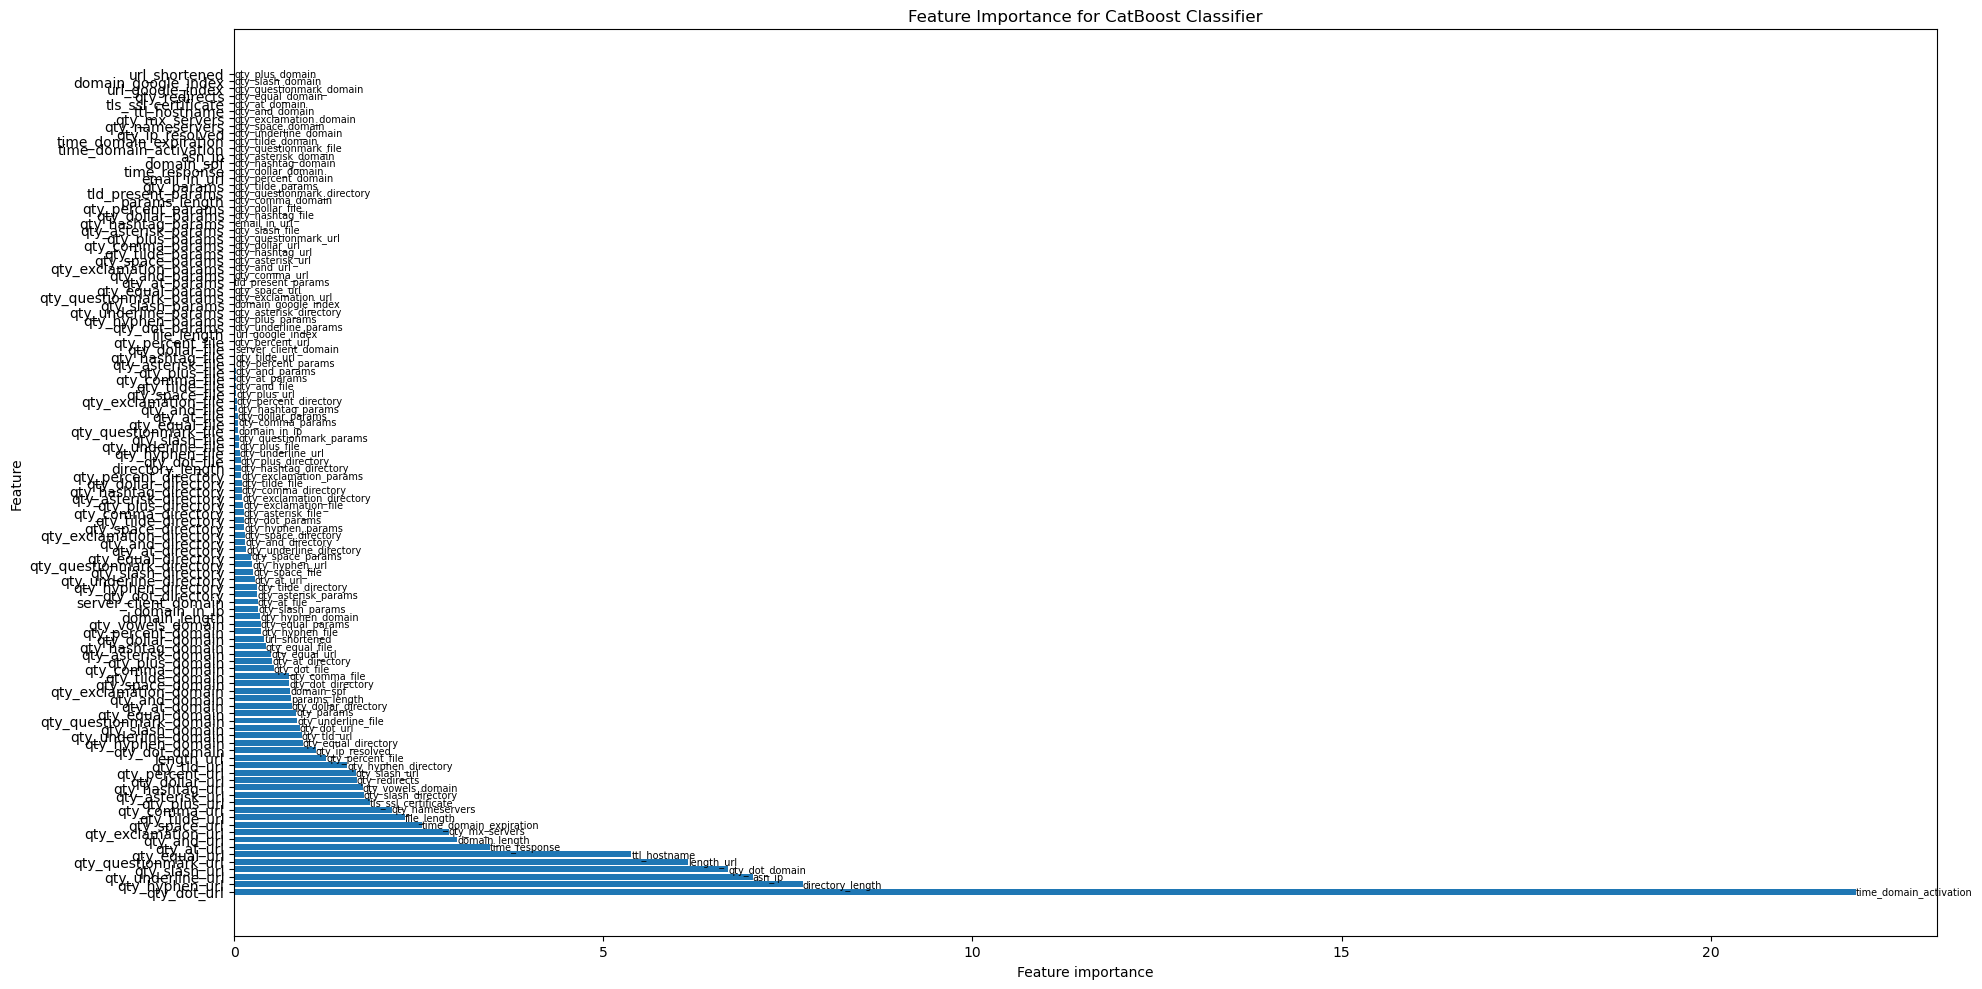

AdaBoost Classifier
--------------------
Train Accuracy: 0.9440703556353939
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       0.94      0.95      0.94     44626
   malicious       0.95      0.94      0.94     46113

    accuracy                           0.94     90739
   macro avg       0.94      0.94      0.94     90739
weighted avg       0.94      0.94      0.94     90739

-----------------------------------
Test Accuracy: 0.9422966718095658
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.93      0.95      0.94     11254
   malicious       0.95      0.93      0.94     11431

    accuracy                           0.94     22685
   macro avg       0.94      0.94      0.94     22685
weighted avg       0.94      0.94      0.94     22685





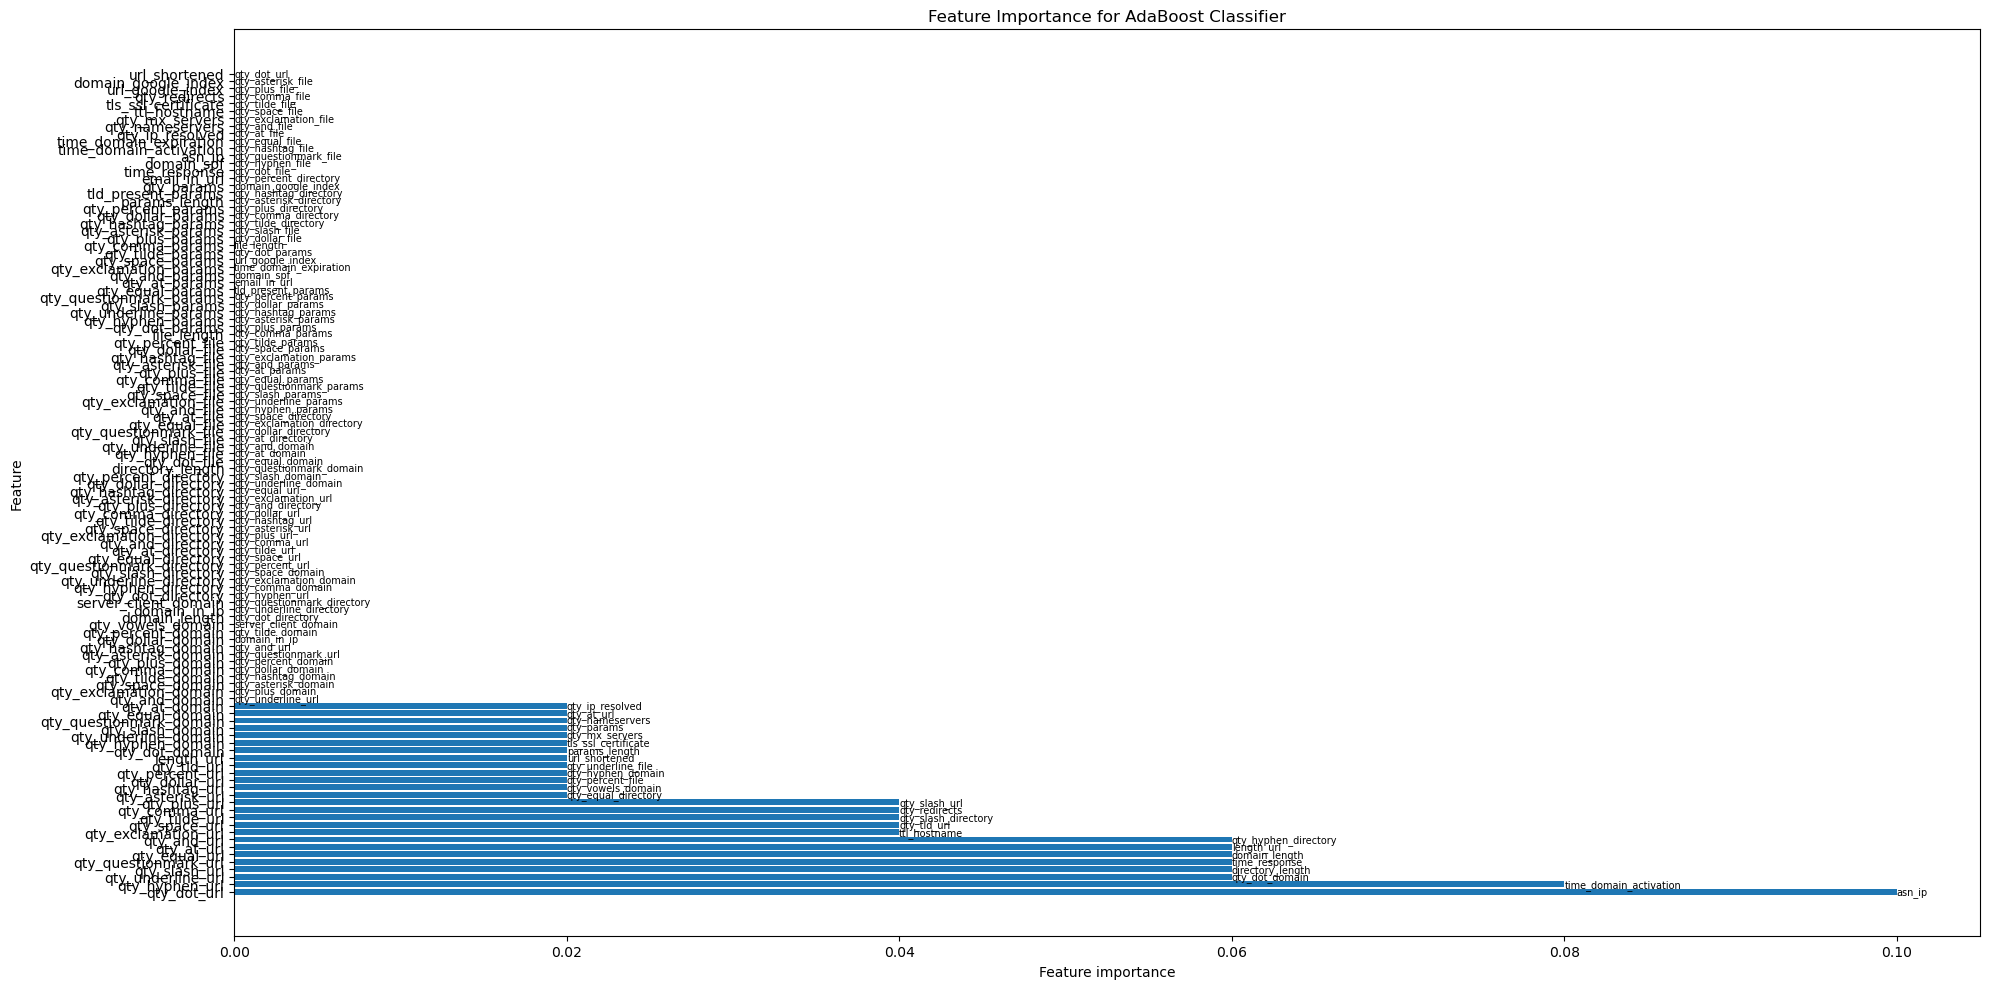

Support Vector Machine
--------------------
Train Accuracy: 0.9513549851772667
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       0.94      0.96      0.95     44387
   malicious       0.96      0.94      0.95     46352

    accuracy                           0.95     90739
   macro avg       0.95      0.95      0.95     90739
weighted avg       0.95      0.95      0.95     90739

-----------------------------------
Test Accuracy: 0.951024906325766
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.94      0.96      0.95     11168
   malicious       0.96      0.94      0.95     11517

    accuracy                           0.95     22685
   macro avg       0.95      0.95      0.95     22685
weighted avg       0.95      0.95      0.95     22685





In [12]:
# Define models
models = {
    "Naive Bayes Classifier": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Support Vector Machine": SVC()
}

model_list = []
train_accuracies = []
test_accuracies = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy, model_classification_report_train = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_classification_report_test = evaluate_model(y_test, y_test_pred)

    print(name)
    print('-' * 20)
    print('Train Accuracy:', model_train_accuracy)
    print('Train Classification Report:\n', model_classification_report_train)
    print('-' * 35)
    print('Test Accuracy:', model_test_accuracy)
    print('Test Classification Report:\n', model_classification_report_test)
    print('=' * 35)
    print('\n')
    
    model_list.append(name)
    train_accuracies.append(model_train_accuracy)
    test_accuracies.append(model_test_accuracy)

    # Plot feature importance for models that support it
    X_cols = [col for col in df.columns if col != "phishing"]
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]  # Sort indices by importance, descending

        plt.figure(figsize=(20, 10))
        n_features = X_train.shape[1]
        bars = plt.barh(range(len(X_cols)), importances[indices], align='center')
        plt.yticks(np.arange(n_features), X_cols)
        plt.xlabel("Feature importance")
        plt.ylabel("Feature")
        plt.title(f"Feature Importance for {name}")
        
        # Add labels on the bars
        for bar, index in zip(bars, indices):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, X_cols[index], 
                 va='center', ha='left', fontsize=7)
        
        plt.tight_layout()  # Adjust layout to prevent overlapping
        plt.show()

In [13]:
results_df = pd.DataFrame(list(zip(model_list, test_accuracies)), columns=['Model Name', 'Test Accuracy']).sort_values(by=["Test Accuracy"],ascending=False)
results_df

,Model Name,Test Accuracy
2,Random Forest Classifier,0.976813
4,CatBoost Classifier,0.975182
3,XGBClassifier,0.975094
1,Decision Tree Classifier,0.964294
6,Support Vector Machine,0.951025
5,AdaBoost Classifier,0.942297
0,Naive Bayes Classifier,0.776328


In [14]:
import pickle

best_model_name = results_df.iloc[0]['Model Name']
best_model = models[best_model_name]
# pickle.dump(best_model, 'best_model.pkl')

print(f"The best model is {best_model_name} with a test accuracy of {results_df.iloc[0]['Test Accuracy']:.4f}")

The best model is Random Forest Classifier with a test accuracy of 0.9768


## Testing sample URL

In [75]:
import dns.resolver
import whois
import ipwhois
import requests
import socket
import ssl
import time
from urllib.parse import urlparse, parse_qs

def extract_url_features(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc.split(':')[0]
    
    def count_occurrences(string, chars):
        return {char: string.count(char) for char in chars}

    def is_ip(domain):
        try:
            socket.inet_aton(domain)
            return True
        except socket.error:
            return False
    
    def get_time_response(domain):
        try:
            start_time = time.time()
            requests.get(f"http://{domain}", timeout=5)
            return time.time() - start_time
        except:
            return None

    def get_spf_record(domain):
        try:
            answers = dns.resolver.resolve(domain, 'TXT')
            for rdata in answers:
                if 'v=spf1' in str(rdata):
                    return 1
            return 0
        except:
            return -1

    def get_whois_info(domain):
        try:
            domain_info = whois.whois(domain)
            creation_date = domain_info.creation_date
            expiration_date = domain_info.expiration_date
            
            if isinstance(creation_date, list):
                creation_date = creation_date[0]
            if isinstance(expiration_date, list):
                expiration_date = expiration_date[0]
            
            time_domain_activation = (time.time() - creation_date.timestamp()) / (60 * 60 * 24) if creation_date else -1
            time_domain_expiration = (expiration_date.timestamp() - time.time()) / (60 * 60 * 24) if expiration_date else -1
            return time_domain_activation, time_domain_expiration
        except:
            return -1, -1

    def get_dns_info(domain):
        try:
            answers = dns.resolver.resolve(domain, 'MX')
            qty_mx_servers = len(answers)
        except:
            qty_mx_servers = 0
        return qty_mx_servers
    
    def domain_to_ip(domain):
        try:
            ip_address = socket.gethostbyname(domain)
            return ip_address
        except socket.error as e:
            print(f"Error converting domain to IP: {str(e)}")
            return None

    def get_asn_ip(domain):
        try:
            # Convert domain to IP address
            ip_address = domain_to_ip(domain)
            if ip_address:
                # Perform WHOIS lookup using ipwhois library
                obj = ipwhois.IPWhois(ip_address)
                result = obj.lookup_rdap()
                # Extract ASN information if available
                asn = result.get('asn')
                if asn:
                    return int(asn.split(' ')[0])  # Extract ASN number
                else:
                    return -1  # Return -1 if ASN information not found
            else:
                return -1  # Return -1 if domain to IP conversion fails

        except Exception as e:
            print(f"Error retrieving ASN for domain {domain}: {str(e)}")
            return -1  # Return -1 on error
        
    def get_qty_ip_resolved(domain):
        try:
            ips = socket.gethostbyname_ex(domain)
            return len(ips[2])  # Return the number of resolved IPs
        except socket.gaierror:
            return -1  # Return -1 if there's an error resolving IPs
    
    # Function for qty_nameservers (Number of Name Servers)
    def get_qty_nameservers(domain):
        try:
            answers = dns.resolver.resolve(domain, 'NS')
            return len(answers)  # Return the number of resolved name servers
        except dns.resolver.NoAnswer:
            return 0  # Return 0 if no name servers found
        except dns.resolver.NXDOMAIN:
            return -1  # Return -1 if domain does not exist
        except dns.resolver.Timeout:
            return -1  # Return -1 on timeout or other DNS resolution errors

    # Function for ttl_hostname (Time-To-Live of Hostname)
    def get_ttl_hostname(domain):
        try:
            answers = dns.resolver.resolve(domain, 'A')
            return answers.rrset.ttl  # Return TTL of the hostname
        except dns.resolver.NoAnswer:
            return -1  # Return -1 if no answer found
        except dns.resolver.NXDOMAIN:
            return -1  # Return -1 if domain does not exist
        except dns.resolver.Timeout:
            return -1  # Return -1 on timeout or other DNS resolution errors

    # Function for tls_ssl_certificate (TLS/SSL Certificate Check)
    def check_tls_ssl_certificate(domain):
        try:
            context = ssl.create_default_context()
            with socket.create_connection((domain, 443)) as sock:
                with context.wrap_socket(sock, server_hostname=domain) as ssock:
                    cert = ssock.getpeercert()
                    return 1 if cert else 0  # Return True if valid certificate found
        except ssl.SSLError:
            return 0  # Return False if SSL error occurs or no certificate found
        except (socket.gaierror, socket.timeout):
            return 0  # Return False on connection or timeout errors

    # Function for qty_redirects (Number of Redirects)
    def get_qty_redirects(url):
        try:
            response = requests.head(url, allow_redirects=True)
            return len(response.history)  # Return the number of redirects followed
        except requests.RequestException:
            return -1  # Return -1 if there's an error in making the request

    # Function for url_google_index (Check if URL is Indexed on Google)
    def is_indexed_on_google(url):
        try:
            response = requests.get(f"https://www.google.com/search?q=info:{url}")
            return 1 if response.status_code == 200 and url in response.text else False
        except requests.RequestException:
            return 0  # Return False if there's an error in making the request

    # Function for domain_google_index (Check if Domain is Indexed on Google)
    def is_domain_indexed_on_google(domain):
        try:
            response = requests.get(f"https://www.google.com/search?q=site:{domain}")
            return 1 if response.status_code == 200 and domain in response.text else False
        except requests.RequestException:
            return 0  # Return False if there's an error in making the request
    

    chars_to_count = ".-_/=?@&! ~,+*#$%"
    url_path = parsed_url.path
    url_query = parsed_url.query
    url_fragment = parsed_url.fragment
    path = parsed_url.path
    query = parsed_url.query
    params = parsed_url.params
    tld = domain.split('.')[-1] if '.' in domain else ''
    
    url_counts = count_occurrences(url, chars_to_count)
    domain_counts = count_occurrences(domain, chars_to_count)
    path_counts = count_occurrences(path, chars_to_count)
    query_counts = count_occurrences(query, chars_to_count)
    params_counts = count_occurrences(params, chars_to_count)

    vowels = 'aeiou'
    qty_vowels_domain = sum(domain.lower().count(vowel) for vowel in vowels)
    
    time_response = get_time_response(domain)
    domain_spf = get_spf_record(domain)
    time_domain_activation, time_domain_expiration = get_whois_info(domain)
    qty_mx_servers = get_dns_info(domain)
    qty_ip_resolved = get_qty_ip_resolved(domain)
    asn_ip = get_asn_ip(domain)
    qty_nameservers = get_qty_nameservers(domain)
    ttl_hostname = get_ttl_hostname(domain)
    tls_ssl_certificate = check_tls_ssl_certificate(domain)
    qty_redirects = get_qty_redirects(url)
    url_google_index = is_indexed_on_google(url)
    domain_google_index = is_domain_indexed_on_google(domain)
    
    features = {
        # URL features
        "qty_dot_url": url_counts['.'],
        "qty_hyphen_url": url_counts['-'],
        "qty_underline_url": url_counts['_'],
        "qty_slash_url": url_counts['/'],
        "qty_questionmark_url": url_counts['?'],
        "qty_equal_url": url_counts['='],
        "qty_at_url": url_counts['@'],
        "qty_and_url": url_counts['&'],
        "qty_exclamation_url": url_counts['!'],
        "qty_space_url": url_counts[' '],
        "qty_tilde_url": url_counts['~'],
        "qty_comma_url": url_counts[','],
        "qty_plus_url": url_counts['+'],
        "qty_asterisk_url": url_counts['*'],
        "qty_hashtag_url": url_counts['#'],
        "qty_dollar_url": url_counts['$'],
        "qty_percent_url": url_counts['%'],
        "qty_tld_url": len(tld),
        "length_url": len(url),
        
        # Domain features
        "qty_dot_domain": domain_counts['.'],
        "qty_hyphen_domain": domain_counts['-'],
        "qty_underline_domain": domain_counts['_'],
        "qty_slash_domain": domain_counts['/'],
        "qty_questionmark_domain": domain_counts['?'],
        "qty_equal_domain": domain_counts['='],
        "qty_at_domain": domain_counts['@'],
        "qty_and_domain": domain_counts['&'],
        "qty_exclamation_domain": domain_counts['!'],
        "qty_space_domain": domain_counts[' '],
        "qty_tilde_domain": domain_counts['~'],
        "qty_comma_domain": domain_counts[','],
        "qty_plus_domain": domain_counts['+'],
        "qty_asterisk_domain": domain_counts['*'],
        "qty_hashtag_domain": domain_counts['#'],
        "qty_dollar_domain": domain_counts['$'],
        "qty_percent_domain": domain_counts['%'],
        "qty_vowels_domain": qty_vowels_domain,
        "domain_length": len(domain),
        "domain_in_ip": 1 if is_ip(domain) else 0,
        "server_client_domain": 1 if "client" in domain or "server" in domain else 0,
        
        # Directory features
        "qty_dot_directory": path_counts['.'],
        "qty_hyphen_directory": path_counts['-'],
        "qty_underline_directory": path_counts['_'],
        "qty_slash_directory": path_counts['/'],
        "qty_questionmark_directory": path_counts['?'],
        "qty_equal_directory": path_counts['='],
        "qty_at_directory": path_counts['@'],
        "qty_and_directory": path_counts['&'],
        "qty_exclamation_directory": path_counts['!'],
        "qty_space_directory": path_counts[' '],
        "qty_tilde_directory": path_counts['~'],
        "qty_comma_directory": path_counts[','],
        "qty_plus_directory": path_counts['+'],
        "qty_asterisk_directory": path_counts['*'],
        "qty_hashtag_directory": path_counts['#'],
        "qty_dollar_directory": path_counts['$'],
        "qty_percent_directory": path_counts['%'],
        "directory_length": len(path),
        
        # File features
        "qty_dot_file": query_counts['.'],
        "qty_hyphen_file": query_counts['-'],
        "qty_underline_file": query_counts['_'],
        "qty_slash_file": query_counts['/'],
        "qty_questionmark_file": query_counts['?'],
        "qty_equal_file": query_counts['='],
        "qty_at_file": query_counts['@'],
        "qty_and_file": query_counts['&'],
        "qty_exclamation_file": query_counts['!'],
        "qty_space_file": query_counts[' '],
        "qty_tilde_file": query_counts['~'],
        "qty_comma_file": query_counts[','],
        "qty_plus_file": query_counts['+'],
        "qty_asterisk_file": query_counts['*'],
        "qty_hashtag_file": query_counts['#'],
        "qty_dollar_file": query_counts['$'],
        "qty_percent_file": query_counts['%'],
        "file_length": len(query),
        
        # Parameters features
        "qty_dot_params": params_counts['.'],
        "qty_hyphen_params": params_counts['-'],
        "qty_underline_params": params_counts['_'],
        "qty_slash_params": params_counts['/'],
        "qty_questionmark_params": params_counts['?'],
        "qty_equal_params": params_counts['='],
        "qty_at_params": params_counts['@'],
        "qty_and_params": params_counts['&'],
        "qty_exclamation_params": params_counts['!'],
        "qty_space_params": params_counts[' '],
        "qty_tilde_params": params_counts['~'],
        "qty_comma_params": params_counts[','],
        "qty_plus_params": params_counts['+'],
        "qty_asterisk_params": params_counts['*'],
        "qty_hashtag_params": params_counts['#'],
        "qty_dollar_params": params_counts['$'],
        "qty_percent_params": params_counts['%'],
        "params_length": len(params),
        "tld_present_params": 1 if tld != '' else 0,
        "qty_params": len(parse_qs(query)),
        "email_in_url": 1 if '@' in url else 0,
        
        # WHOIS and DNS features
        "time_response": time_response if time_response is not None else -1,
        "domain_spf": domain_spf if domain_spf is not None else -1,
        "asn_ip": asn_ip,
        "time_domain_activation": time_domain_activation if time_domain_activation is not None else -1,
        "time_domain_expiration": time_domain_expiration if time_domain_expiration is not None else -1,
        "qty_ip_resolved": qty_ip_resolved,  # Placeholder, requires DNS lookup
        "qty_nameservers": qty_nameservers,  # Placeholder, requires DNS lookup
        "qty_mx_servers": qty_mx_servers if qty_mx_servers  is not None else 0,
        "ttl_hostname": ttl_hostname,  # Placeholder, requires DNS lookup
        "tls_ssl_certificate": tls_ssl_certificate,  # Placeholder, requires SSL/TLS library
        "qty_redirects": qty_redirects,  # Placeholder, requires HTTP request handling
        "url_google_index": url_google_index,
        "domain_google_index": domain_google_index,
        "url_shortened": 1 if len(url) < 20 else 0,  # Example condition for shortened URL
    }
    
    return features



In [76]:
# Example usage:
URL = "https://www.google.com/"
features = extract_url_features(URL)
for feature, value in features.items():
    print(f"{feature}: {value}")

qty_dot_url: 2
qty_hyphen_url: 0
qty_underline_url: 0
qty_slash_url: 3
qty_questionmark_url: 0
qty_equal_url: 0
qty_at_url: 0
qty_and_url: 0
qty_exclamation_url: 0
qty_space_url: 0
qty_tilde_url: 0
qty_comma_url: 0
qty_plus_url: 0
qty_asterisk_url: 0
qty_hashtag_url: 0
qty_dollar_url: 0
qty_percent_url: 0
qty_tld_url: 3
length_url: 23
qty_dot_domain: 2
qty_hyphen_domain: 0
qty_underline_domain: 0
qty_slash_domain: 0
qty_questionmark_domain: 0
qty_equal_domain: 0
qty_at_domain: 0
qty_and_domain: 0
qty_exclamation_domain: 0
qty_space_domain: 0
qty_tilde_domain: 0
qty_comma_domain: 0
qty_plus_domain: 0
qty_asterisk_domain: 0
qty_hashtag_domain: 0
qty_dollar_domain: 0
qty_percent_domain: 0
qty_vowels_domain: 4
domain_length: 14
domain_in_ip: 0
server_client_domain: 0
qty_dot_directory: 0
qty_hyphen_directory: 0
qty_underline_directory: 0
qty_slash_directory: 1
qty_questionmark_directory: 0
qty_equal_directory: 0
qty_at_directory: 0
qty_and_directory: 0
qty_exclamation_directory: 0
qty_spac

In [77]:
# Assuming `features` is a dictionary or DataFrame containing the extracted features
input_features = [list(features.values())]  # Convert features to a list or array format

# Make predictions
sample = best_model.predict(input_features)
sample

array([1], dtype=int64)